## Linear Regression in Python using scikit-learn
- Generate synthetic linear data.

- Fit a Linear Regression model using scikit-learn.

- Visualize the original data and the fitted regression line.

- Display the regression equation on the plot.

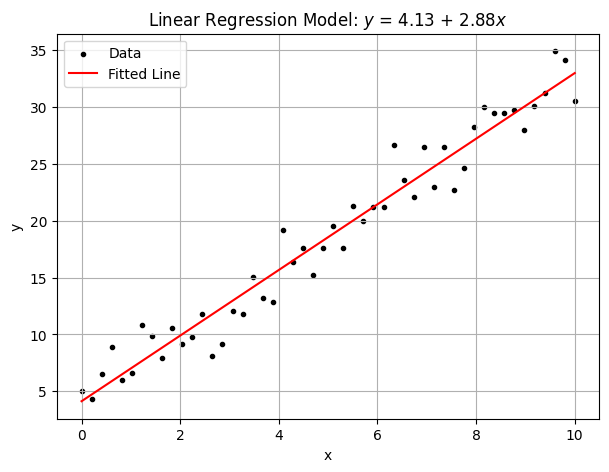

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic linear data
# Let's assume a true model: y = 3x + 4 + noise
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3 * X + 4 + np.random.randn(50) * 2  # Add some noise

# Step 2: Instantiate and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Step 3: Predict values for the regression line
X_MIN, X_MAX = X.min(), X.max()
X_hat = np.linspace(start=X_MIN, stop=X_MAX, num=2)
y_hat = linear_regression.predict(X_hat.reshape(-1, 1))

# Step 4: Prepare regression equation string
model = "$y$ = {:.2f} + {:.2f}$x$".format(linear_regression.intercept_[0], linear_regression.coef_[0][0])

# Step 5: Plot the data and regression line
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y, color="black", marker=".", label="Data")
ax.plot(X_hat, y_hat, color="red", label="Fitted Line")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Linear Regression Model: " + model)
ax.legend()
plt.grid(True)
plt.show()

## Working with advertising dataset

In [3]:
import pandas as pd

data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


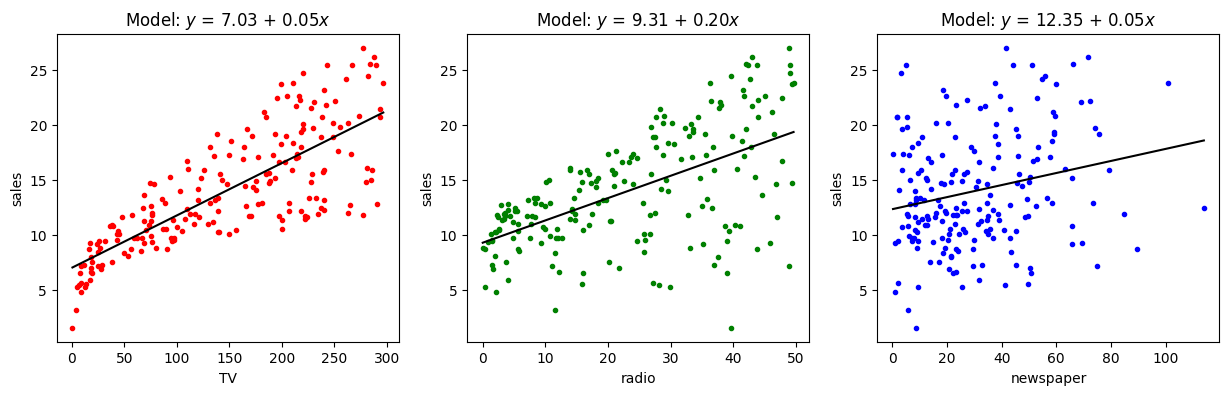

In [4]:
import matplotlib as mpl

fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):
  
    
    LR_feature = LinearRegression()
    LR_feature.fit(data_df[[feature]], data_df[["sales"]])

    # Predictions
    X_hat = np.linspace(start=data_df[feature].min(), stop=data_df[feature].max(), num=2)
    y_hat = LR_feature.predict( X_hat.reshape(-1,1) )

    # Plot of sales vs TV
    model = "$y$ = {:.2f} + {:.2f}$x$".format(LR_feature.intercept_[0], *LR_feature.coef_[0])
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X_hat, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title("Model: " + model)
    return ax

# Train model using features data to predict sales
features = ["TV", "radio", "newspaper"]
colors = ["red", "green", "blue"]

for ax, feature, color in zip(gs, features, colors):
    axes = fig.add_subplot(ax)
    train_plot(data_df, feature, axes, color)

plt.show()

In [8]:
from IPython.display import display, HTML

# Training Linear Regression using TV and Radio features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio"]], data_df[["sales"]])

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

print("")

# Training Linear Regression using all features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio", "newspaper"]], data_df[["sales"]])
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))